Train data:  (50000, 32, 32, 3)
Train filenames:  (50000,)
Train labels:  (50000,)
Test data:  (10000, 32, 32, 3)
Test filenames:  (10000,)
Test labels:  (10000,)
Label names:  (10,)


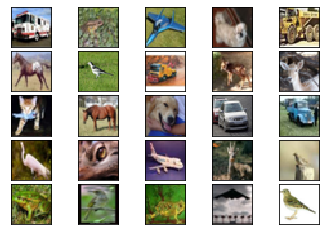

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os

#The data downloaded from: https://www.cs.toronto.edu/~kriz/cifar.html
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
"""
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 
training images and 10000 test images.
The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains 
exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random 
order, but some training batches may contain more images from one class than another. Between them, the training 
batches contain exactly 5000 images from each class.
"""


def unpickle(file):
    """load the cifar-10 data"""

    with open(file, 'rb') as fo:
        data = pickle.load(fo, encoding='bytes')
    return data


def load_cifar_10_data(data_dir, negatives=False):
    """
    Return train_data, train_filenames, train_labels, test_data, test_filenames, test_labels
    """

    # get the meta_data_dict
    # num_cases_per_batch: 1000
    # label_names: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    # num_vis: :3072

    meta_data_dict = unpickle(data_dir + "/batches.meta")
    cifar_label_names = meta_data_dict[b'label_names']
    cifar_label_names = np.array(cifar_label_names)

    # training data
    cifar_train_data = None
    cifar_train_filenames = []
    cifar_train_labels = []

    # cifar_train_data_dict
    # 'batch_label': 'training batch 5 of 5'
    # 'data': ndarray
    # 'filenames': list
    # 'labels': list

    for i in range(1, 6):
        cifar_train_data_dict = unpickle(data_dir + "/data_batch_{}".format(i))
        if i == 1:
            cifar_train_data = cifar_train_data_dict[b'data']
        else:
            cifar_train_data = np.vstack((cifar_train_data, cifar_train_data_dict[b'data']))
        cifar_train_filenames += cifar_train_data_dict[b'filenames']
        cifar_train_labels += cifar_train_data_dict[b'labels']

    cifar_train_data = cifar_train_data.reshape((len(cifar_train_data), 3, 32, 32))
    if negatives:
        cifar_train_data = cifar_train_data.transpose(0, 2, 3, 1).astype(np.float32)
    else:
        cifar_train_data = np.rollaxis(cifar_train_data, 1, 4)
    cifar_train_filenames = np.array(cifar_train_filenames)
    cifar_train_labels = np.array(cifar_train_labels)

    # test data
    # cifar_test_data_dict
    # 'batch_label': 'testing batch 1 of 1'
    # 'data': ndarray
    # 'filenames': list
    # 'labels': list

    cifar_test_data_dict = unpickle(data_dir + "/test_batch")
    cifar_test_data = cifar_test_data_dict[b'data']
    cifar_test_filenames = cifar_test_data_dict[b'filenames']
    cifar_test_labels = cifar_test_data_dict[b'labels']

    cifar_test_data = cifar_test_data.reshape((len(cifar_test_data), 3, 32, 32))
    if negatives:
        cifar_test_data = cifar_test_data.transpose(0, 2, 3, 1).astype(np.float32)
    else:
        cifar_test_data = np.rollaxis(cifar_test_data, 1, 4)
    cifar_test_filenames = np.array(cifar_test_filenames)
    cifar_test_labels = np.array(cifar_test_labels)

    return cifar_train_data, cifar_train_filenames, cifar_train_labels, \
        cifar_test_data, cifar_test_filenames, cifar_test_labels, cifar_label_names


if __name__ == "__main__":
    """show it works"""

    cifar_10_dir = 'cifar-10-batches-py'

    train_data, train_filenames, train_labels, test_data, test_filenames, test_labels, label_names = \
        load_cifar_10_data(cifar_10_dir)

    print("Train data: ", train_data.shape)
    print("Train filenames: ", train_filenames.shape)
    print("Train labels: ", train_labels.shape)
    print("Test data: ", test_data.shape)
    print("Test filenames: ", test_filenames.shape)
    print("Test labels: ", test_labels.shape)
    print("Label names: ", label_names.shape)

    # Don't forget that the label_names and filesnames are in binary and need conversion if used.

    # display some random training images in a 25x25 grid
    num_plot = 5
    f, ax = plt.subplots(num_plot, num_plot)
    for m in range(num_plot):
        for n in range(num_plot):
            idx = np.random.randint(0, train_data.shape[0])
            ax[m, n].imshow(train_data[idx])
            ax[m, n].get_xaxis().set_visible(False)
            ax[m, n].get_yaxis().set_visible(False)
    f.subplots_adjust(hspace=0.1)
    f.subplots_adjust(wspace=0)
    plt.show()
#citied from: https://github.com/snatch59/load-cifar-10/blob/master/load_cifar_10.py

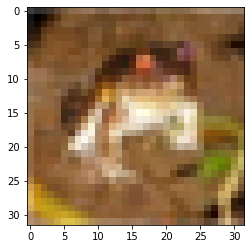

In [3]:
#check the example: train_data[0]
plt.imshow(train_data[0])

In [4]:
train_labels[0]

6

In [5]:
#check labels
label_names

array([b'airplane', b'automobile', b'bird', b'cat', b'deer', b'dog',
       b'frog', b'horse', b'ship', b'truck'], dtype='|S10')

In [6]:
#encode the label
from tensorflow.python.keras.utils import to_categorical

train_encoded = to_categorical(train_labels)
test_encoded = to_categorical(test_labels)

In [7]:
#min-max normalization
train_norm=train_data/255
test_norm=test_data/255

In [8]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense

In [9]:
#build the model
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',input_shape=[32,32,3]))
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.4))

model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
          
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))


In [10]:
#it is good to use adam with sparse gradient 
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['sparse_categorical_accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0

In [11]:
#fit model
model.fit(train_norm,train_labels)

Train on 50000 samples
50000/50000 [==============================] - 148s 3ms/sample - loss: 1.7496 - sparse_categorical_accuracy: 0.3493


In [12]:
#fit model epochs=10
history=model.fit(train_norm,train_labels,batch_size=10,epochs=10,verbose=1,validation_data=(test_norm,test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 194s 4ms/sample - loss: 1.4458 - sparse_categorical_accuracy: 0.4741 - val_loss: 1.2201 - val_sparse_categorical_accuracy: 0.5513
Epoch 2/10
50000/50000 [==============================] - 192s 4ms/sample - loss: 1.3265 - sparse_categorical_accuracy: 0.5211 - val_loss: 1.1403 - val_sparse_categorical_accuracy: 0.5980
Epoch 3/10
50000/50000 [==============================] - 192s 4ms/sample - loss: 1.2777 - sparse_categorical_accuracy: 0.5438 - val_loss: 1.1543 - val_sparse_categorical_accuracy: 0.5820
Epoch 4/10
50000/50000 [==============================] - 183s 4ms/sample - loss: 1.2525 - sparse_categorical_accuracy: 0.5520 - val_loss: 1.1057 - val_sparse_categorical_accuracy: 0.6151
Epoch 5/10
50000/50000 [==============================] - 181s 4ms/sample - loss: 1.2308 - sparse_categorical_accuracy: 0.5615 - val_loss: 1.1310 - val_sparse_categorical_accuracy: 0.5931
Epoch 6/10

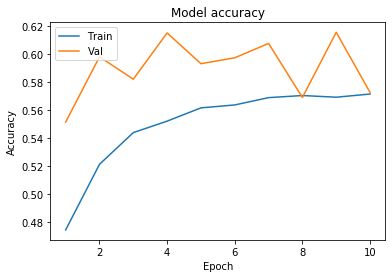

In [13]:
#plot accuracy values
epoch_range=range(1,11)
plt.plot(epoch_range,history.history['sparse_categorical_accuracy'])
plt.plot(epoch_range,history.history['val_sparse_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(["Train","Val"],loc="upper left")
plt.show()

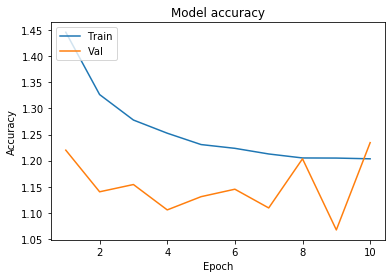

In [14]:
#plot loss values
epoch_range=range(1,11)
plt.plot(epoch_range,history.history['loss'])
plt.plot(epoch_range,history.history['val_loss'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(["Train","Val"],loc="upper left")
plt.show()

In [18]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [19]:
val_pred=model.predict_classes(test_norm)

In [22]:
test_labels

array([3, 8, 8, ..., 5, 1, 7])

In [23]:
val_pred

array([3, 8, 8, ..., 5, 2, 7])

In [35]:
mat=confusion_matrix(test_labels,val_pred)

In [36]:
mat

array([[629,  18,  74,  41,  18,   2,  20,   8, 170,  20],
       [ 31, 798,   3,  30,   3,   7,  45,   1,  53,  29],
       [ 69,   3, 465, 134,  69,  87, 144,   9,  20,   0],
       [ 38,   3,  74, 486,  13, 171, 185,   7,  21,   2],
       [ 30,   3, 131, 129, 316,  52, 298,  28,  13,   0],
       [ 19,   2, 101, 292,  25, 451,  83,  11,  16,   0],
       [  4,   2,  46,  88,  12,  16, 819,   1,  11,   1],
       [ 17,   6,  56, 144,  93, 155,  78, 437,   5,   9],
       [ 75,  20,  20,  39,   6,   7,   8,   1, 816,   8],
       [ 40, 208,   6,  81,   4,   9,  67,   9,  68, 508]])

(<Figure size 864x864 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11335bd10>)

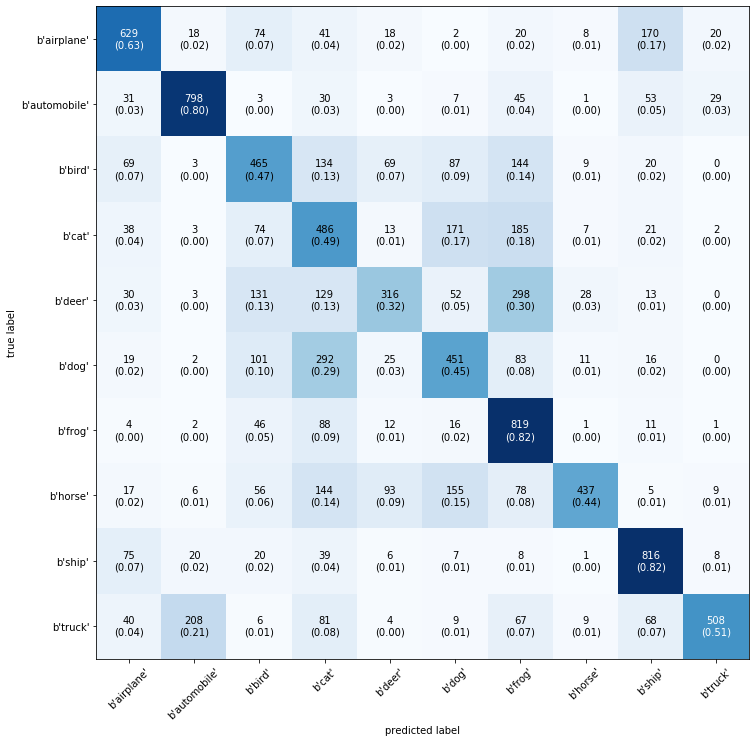

In [47]:
#plot confusion matrix
plot_confusion_matrix(mat,figsize=(12,12),class_names=label_names,show_normed=True)